In [1]:
from Population import Population
import matplotlib.pyplot as plt
from tqdm import tqdm
from IPython import display

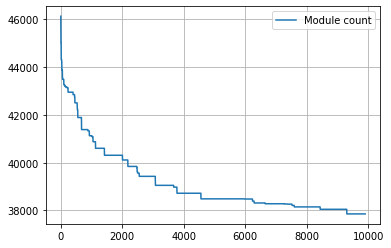

100%|██████████| 10000/10000 [10:38<00:00, 15.65it/s]


In [3]:
popSize = 100
iterCount = 10000
mutationProb = 0.1
crossProb = 0.8
modularity = 1
pathCount = 0

population = Population(popSize, pathCount)
moduleCount = list()

for x, y in tqdm(population.evolution(mutationProb, crossProb, iterCount, modularity), total = iterCount):
    moduleCount.append(y)
    if x % 100 == 0:
        display.clear_output()
        plt.plot(moduleCount, label= 'Module count')
        plt.legend()
        plt.grid()
        plt.show()

Pierwsze uruchomienie algorytmu, rozeznanie ile czasu zajmuje wykonanie z arbitralnie dobranymi parametrami. Widać, że algorytm jak najbardziej jest w stanie minimalizowac zadaną funkcję celu. W następnym kroku dobrane zostaną parametry. Przy strojeniu paramertów będzie używana pełna dezagregacja, ponieważ jest to najcięzszy przypadek dla podanego zadania. Dobieranie parametrów zostanie uproszczone, poprzez założenie, że parametry są od siebie niezależne.

In [14]:
iterCount = 100
mutationProb = 0.1
crossProb = 0.8
modularity = 1
pathCount = 0
results = list()
labels = list()

for popSize in range(100, 600, 100):
    moduleCount = list()
    labels.append(popSize)
    for iter in tqdm(range(20)):
        population = Population(popSize, pathCount)
        result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
        moduleCount.append(result)
    results.append(moduleCount)
    display.clear_output()
    plt.boxplot(results, labels= labels)
    plt.show()

  0%|          | 0/20 [00:00<?, ?it/s]

Wykres porzedstawia zależność wielkości populacji od ilości modułów. Dla każdego rozmiaru populacji wyniki były zbierane 20 razy i przedstawiane jako boxplot.

In [ ]:
iterCount = 10000
mutationProb = 0.1
crossProb = 0.8
modularity = 1
pathCount = 0
results = list()
labels = list()

for popSize in tqdm(range(100, 600, 100)):
    labels.append(popSize)
    population = Population(popSize, pathCount)
    result = population.startEvolution(mutationProb, crossProb, iterCount, modularity)
    results.append(result)
    display.clear_output()
    plt.bar(results, bottom= labels)
    plt.show()

Test głębokości znalezionego optimum w zależności od wielkości populacji. Ze względu na zbyt długie obliczenia, test będzie przeprowadzany raz dla danej wielkości populacji. Poszukujemy znacznych różnic w głębokości.